In [25]:
from PIL import Image
import matplotlib.pyplot as plt

In [28]:
import torch
import torchvision
torchvision.__version__, torch.__version__

('0.7.0', '1.6.0')

### Some Models
https://pytorch.org/docs/stable/torchvision/models.html

In [30]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
                                        pretrained=True)

In [71]:
images, boxes = torch.rand(4,3,600,1200), torch.rand(4,2,4)

labels = torch.randint(1,91,(4,2))

labels

images = [e for e in images]

targets = []

for i in range(len(images)):
    d = {}
    d['boxes'] = boxes[i]
    d['labels'] = labels[i]
    targets.append(d)

model(images, targets)

ValueError: All bounding boxes should have positive height and width. Found invaid box [0.026290198788046837, 0.251305490732193, 0.7191632986068726, 0.053910426795482635] for target at index 0.

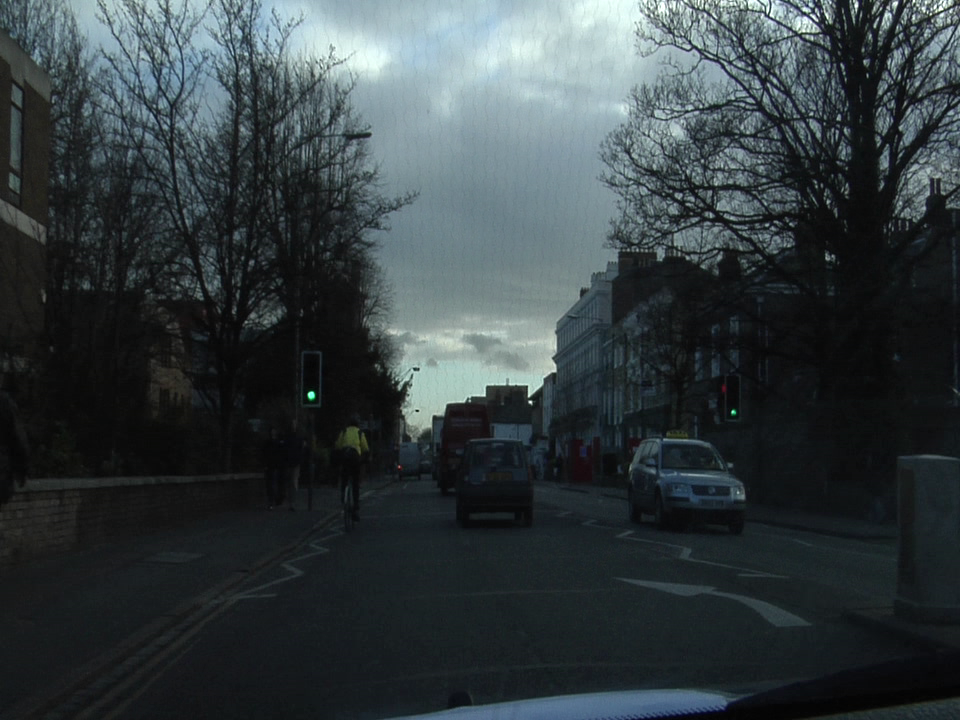

In [73]:
img

In [75]:
import numpy as np

In [76]:
img_t = torch.tensor(np.array(img), dtype=)

In [84]:
from torchvision import transforms

In [90]:
im = transforms.ToTensor()(img).unsqueeze_(0)

In [91]:
type(im)

torch.Tensor

In [92]:
im.shape

torch.Size([1, 3, 720, 960])

In [94]:
pred = model(im)

In [99]:
pred[0]['boxes'][0]

tensor([301.0832, 351.1842, 323.1507, 406.7140], grad_fn=<SelectBackward>)

In [100]:
pred[0]['boxes'].tolist()

[[301.08319091796875, 351.1841735839844, 323.1507263183594, 406.7140197753906],
 [332.32305908203125, 416.8714904785156, 370.0729064941406, 522.681884765625],
 [624.8900146484375, 436.9277648925781, 748.8983764648438, 534.0490112304688],
 [435.1310119628906, 402.408447265625, 491.5669250488281, 493.82769775390625],
 [719.9186401367188, 374.973876953125, 741.0126953125, 421.26055908203125],
 [395.8647766113281, 444.2205505371094, 425.39013671875, 478.0008544921875],
 [257.9962463378906, 425.13885498046875, 287.225341796875, 508.419189453125],
 [273.0030212402344, 426.6414489746094, 304.0202331542969, 510.50823974609375],
 [451.7637939453125, 433.00982666015625, 534.2750854492188, 525.0093994140625],
 [418.2286376953125, 449.62017822265625, 433.45166015625, 477.298583984375],
 [341.1950378417969, 464.1587829589844, 359.5881652832031, 531.7251586914062],
 [452.7569274902344, 441.1490173339844, 534.468017578125, 527.076904296875],
 [553.0655517578125, 450.3968811035156, 562.9437255859375, 

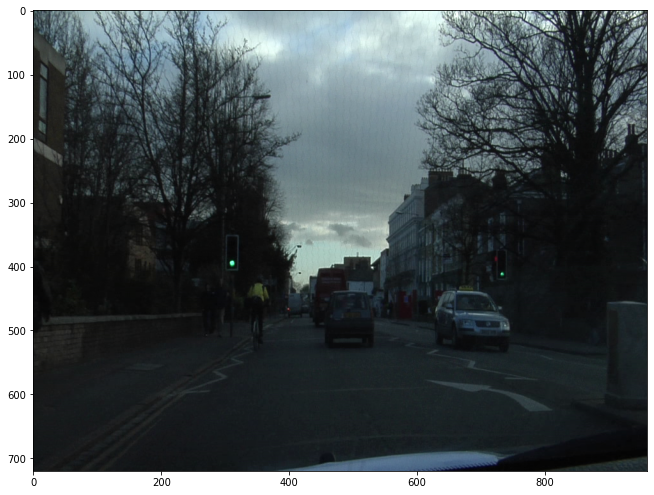

In [104]:
plt.figure(figsize=(11,11))
plt.imshow(np.array(img))
plt.

In [72]:
boxes

tensor([[[0.1386, 0.3852, 0.6566, 0.7993],
         [0.0237, 0.2264, 0.6474, 0.0486]],

        [[0.4172, 0.3100, 0.7969, 0.9040],
         [0.3138, 0.8103, 0.2128, 0.6211]],

        [[0.1350, 0.1383, 0.4139, 0.3603],
         [0.3706, 0.3604, 0.9031, 0.2253]],

        [[0.4861, 0.5959, 0.7192, 0.2166],
         [0.7135, 0.1350, 0.6303, 0.6049]]])

### Explore existing datasets

In [5]:
!ls ~/.fastai/data/camvid/images | wc -l

702


In [6]:
!ls ~/.fastai/data/camvid/images | head -n 10

0001TP_006690.png
0001TP_006720.png
0001TP_006750.png
0001TP_006780.png
0001TP_006810.png
0001TP_006840.png
0001TP_006870.png
0001TP_006900.png
0001TP_006930.png
0001TP_006960.png


In [20]:
p = '/home/user/.fastai/data/camvid/images/'
fns = os.listdir(p)
fn = fns[20]
# fn = '0001TP_006960.png'

In [23]:
img = Image.open(p + fn)

In [24]:
img.size

(960, 720)

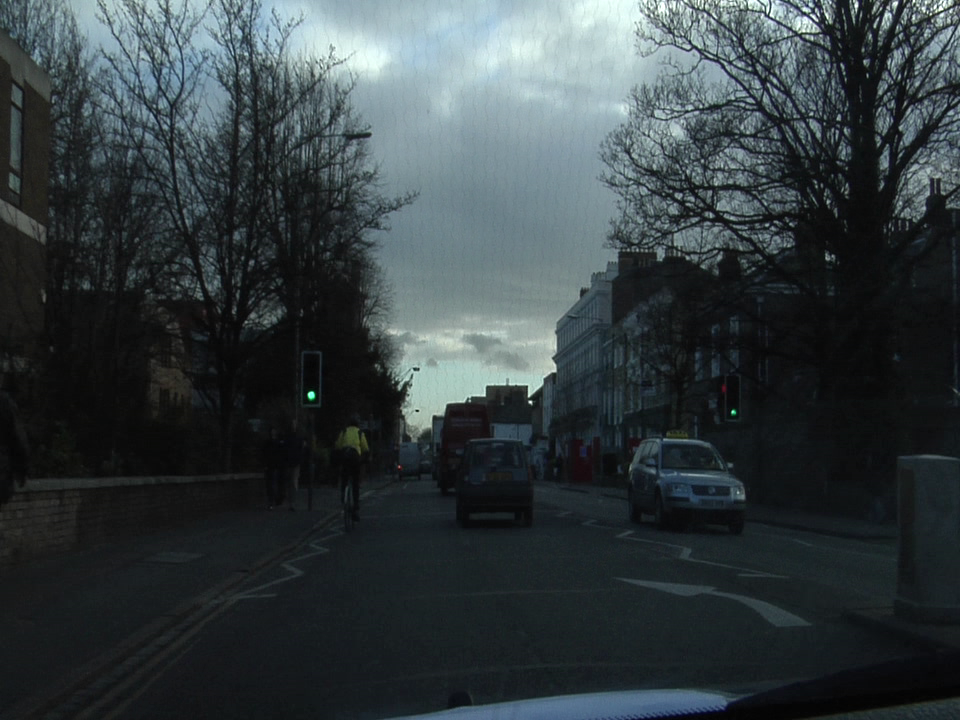

In [22]:
img